In [2]:
import json
import os
from collections import defaultdict

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

In [3]:
RESULTS_DIR = 'results/postgres_1800'

In [4]:
data = defaultdict(list)
for filename in os.listdir(RESULTS_DIR):
    if not (filename.startswith('latency_') and filename.endswith('.json')): continue
    with open(os.path.join(RESULTS_DIR, filename), 'r') as writer:
        latency_results = json.load(writer)
        for key in latency_results:
            data[key].extend(latency_results[key])

data = {key: pd.Series(data[key]) * 1000 for key in data}
data

{'stock_level': 0        70.469379
 1        60.406685
 2        46.847820
 3       191.873074
 4       159.135818
            ...    
 2297    234.015226
 2298    198.190928
 2299    298.541784
 2300    179.124832
 2301    280.495882
 Length: 2302, dtype: float64,
 'payment': 0         24.466991
 1         25.954962
 2         12.064934
 3         11.858463
 4         17.600060
             ...    
 24396     16.744852
 24397     17.272234
 24398    229.608536
 24399     18.979073
 24400     40.007114
 Length: 24401, dtype: float64,
 'order': 0        41.227579
 1        42.525530
 2        37.827969
 3        30.988693
 4        41.095734
            ...    
 25978    43.357134
 25979    22.020340
 25980    43.860912
 25981    97.311735
 25982    47.250271
 Length: 25983, dtype: float64,
 'delivery': 0        32.115698
 1        35.402298
 2        60.471296
 3        38.906813
 4        44.629812
            ...    
 2258    237.218142
 2259    247.700214
 2260    230.232000
 2261  

# Plots

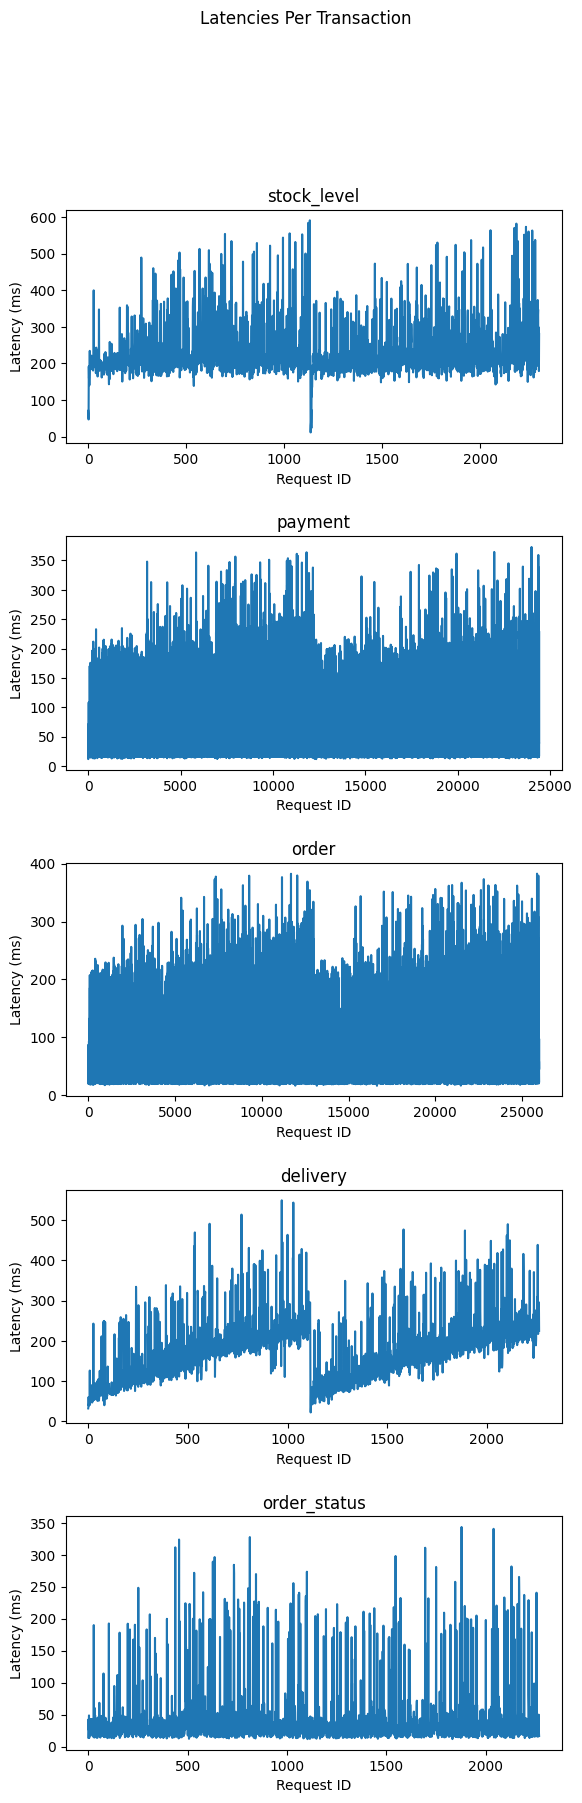

In [5]:
figure, axes = plt.subplots(nrows=5)
figure.set_figheight(20)
figure.subplots_adjust(hspace=0.4)
figure.suptitle('Latencies Per Transaction')
for i, key in enumerate(data):
    axes[i].plot(data[key])
    axes[i].set_title(key)
    axes[i].set_xlabel('Request ID')
    axes[i].set_ylabel('Latency (ms)')
figure.savefig(os.path.join(RESULTS_DIR, 'latency.png'))

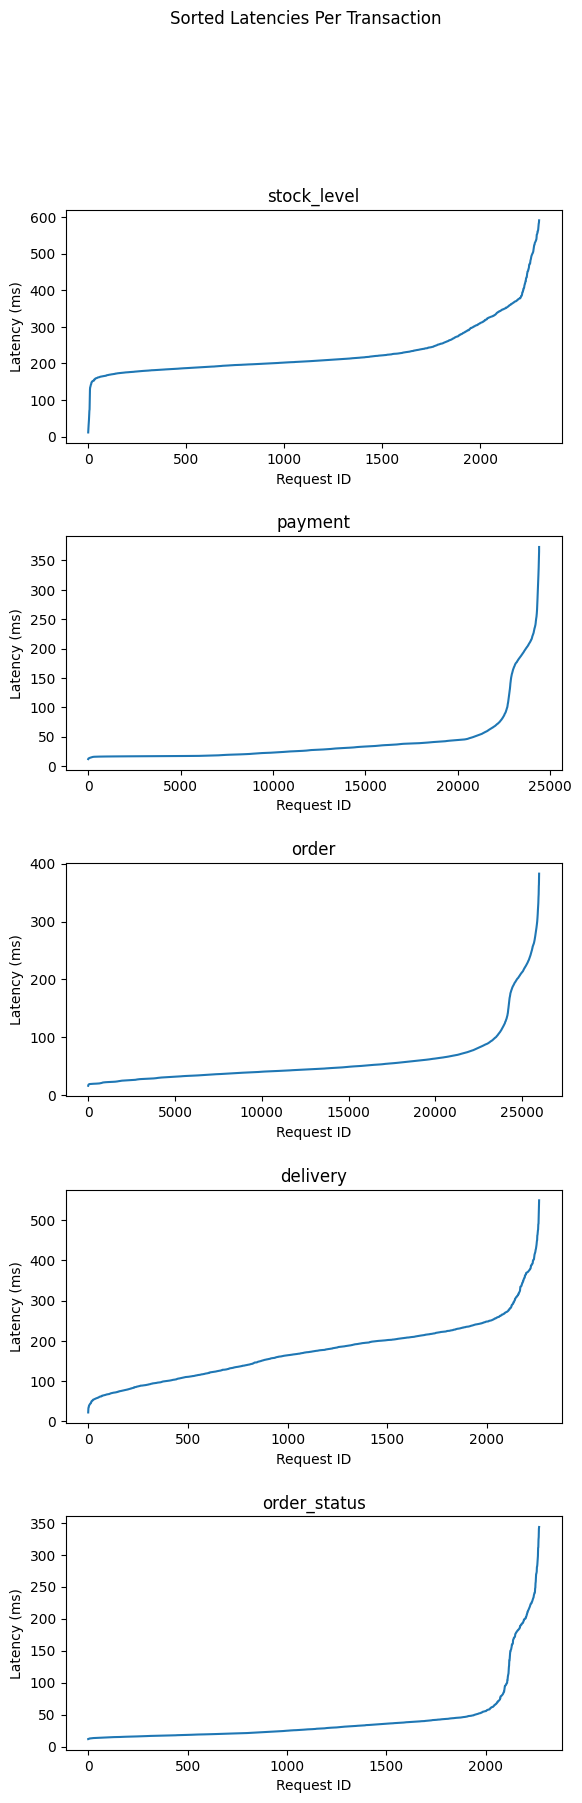

In [6]:
figure, axes = plt.subplots(nrows=5)
figure.set_figheight(20)
figure.subplots_adjust(hspace=0.4)
figure.suptitle('Sorted Latencies Per Transaction')
for i, key in enumerate(data):
    axes[i].plot(sorted(data[key]))
    axes[i].set_title(key)
    axes[i].set_xlabel('Request ID')
    axes[i].set_ylabel('Latency (ms)')
figure.savefig(os.path.join(RESULTS_DIR, 'sorted_latency.png'))

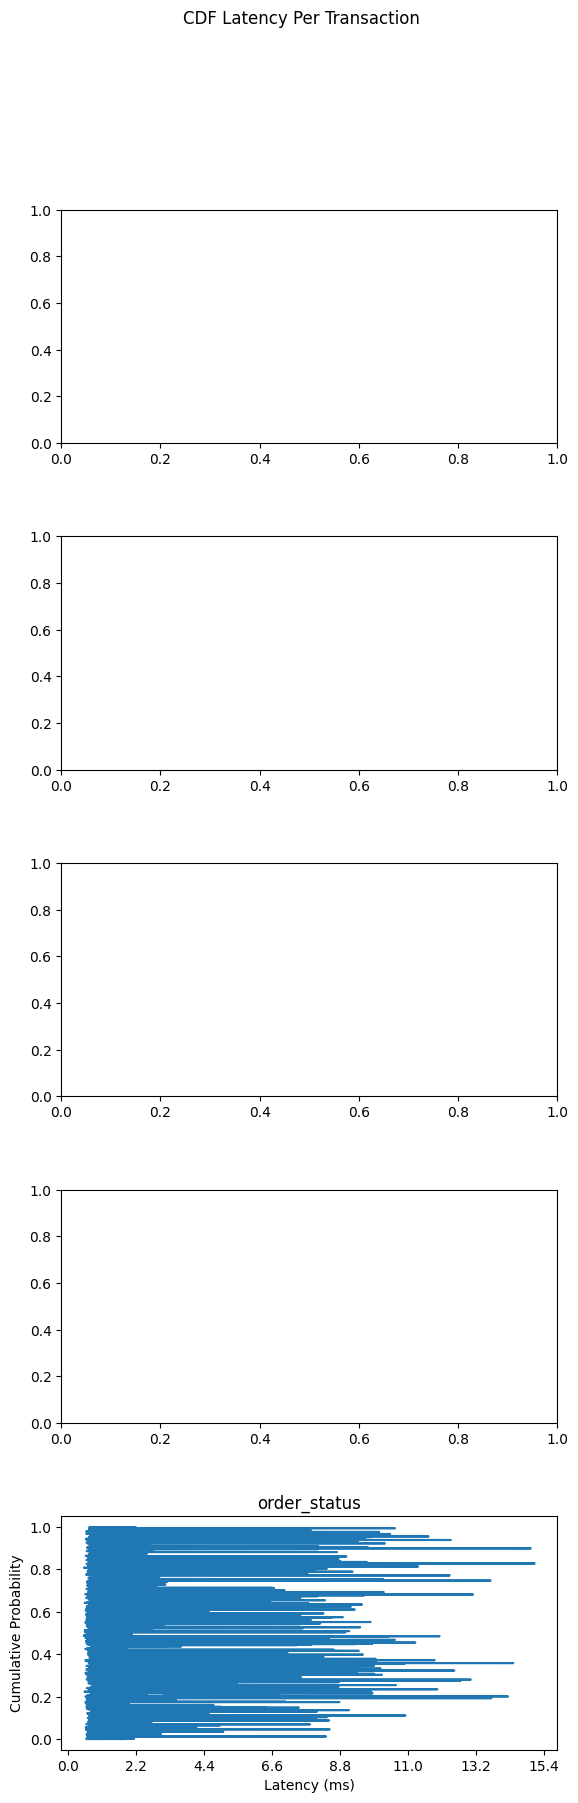

In [7]:
# Cumulative Distribution Function
figure, axes = plt.subplots(nrows=5)
figure.set_figheight(20)
figure.subplots_adjust(hspace=0.4)
figure.suptitle('CDF Latency Per Transaction')
for i, key in enumerate(data):
    cumsum = np.arange(1, len(data[key]) + 1) / len(data[key])
axes[i].plot(data[key], cumsum)
axes[i].set_title(key)
axes[i].set_xlabel('Latency (ms)')
axes[i].set_ylabel('Cumulative Probability')
axes[i].xaxis.set_major_formatter(mtick.PercentFormatter(len(data[key]), symbol=''))
figure.savefig(os.path.join(RESULTS_DIR, 'cdf_latency.png'))

# Metrics

In [8]:
latency_quantiles = [[key,
                      round(data[key].quantile(q=0.5), 4),
                      round(data[key].quantile(q=0.9), 4),
                      round(data[key].quantile(q=0.95), 4),
                      round(data[key].quantile(q=0.99), 4)]
                     for key in data]
df = pd.DataFrame(latency_quantiles, columns=['Transaction', 'P50', 'P90', 'P95', 'P99'])
df.to_csv(os.path.join(RESULTS_DIR, 'latency_quantiles.csv'), index=False)
df

,Transaction,P50,P90,P95,P99
0,stock_level,207.0726,330.8747,371.0484,525.3593
1,payment,27.5140,67.1570,176.4691,234.7860
2,order,44.7543,97.4473,199.4617,268.0818
3,delivery,173.8257,254.4237,309.5426,415.0351
4,order_status,27.2954,63.7320,179.2172,240.5984


In [10]:
data['order'].describe()

count    25983.000000
mean        59.976566
std         50.365971
min         16.138554
25%         34.392118
50%         44.754267
75%         61.210394
max        382.817507
dtype: float64